In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("/content/drive/MyDrive/АБД/Задания/РАД/data/France_weather_data.csv")
df

,utc_timestamp,temperature,radiation_direct_horizontal,radiation_diffuse_horizontal
0,2016-01-01T00:00:00Z,5.571,0.0,0.0
1,2016-01-01T01:00:00Z,5.415,0.0,0.0
2,2016-01-01T02:00:00Z,5.288,0.0,0.0
3,2016-01-01T03:00:00Z,5.177,0.0,0.0
4,2016-01-01T04:00:00Z,5.131,0.0,0.0
...,...,...,...,...
35059,2019-12-31T19:00:00Z,2.048,0.0,0.0
35060,2019-12-31T20:00:00Z,1.995,0.0,0.0
35061,2019-12-31T21:00:00Z,2.107,0.0,0.0
35062,2019-12-31T22:00:00Z,2.280,0.0,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   utc_timestamp                 35064 non-null  object 
 1   temperature                   35064 non-null  float64
 2   radiation_direct_horizontal   35064 non-null  float64
 3   radiation_diffuse_horizontal  35064 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


Преобразуем признак "utc_timestamp" в тип данных datetime

In [35]:
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   utc_timestamp                 35064 non-null  datetime64[ns, UTC]
 1   temperature                   35064 non-null  float64            
 2   radiation_direct_horizontal   35064 non-null  float64            
 3   radiation_diffuse_horizontal  35064 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 1.1 MB


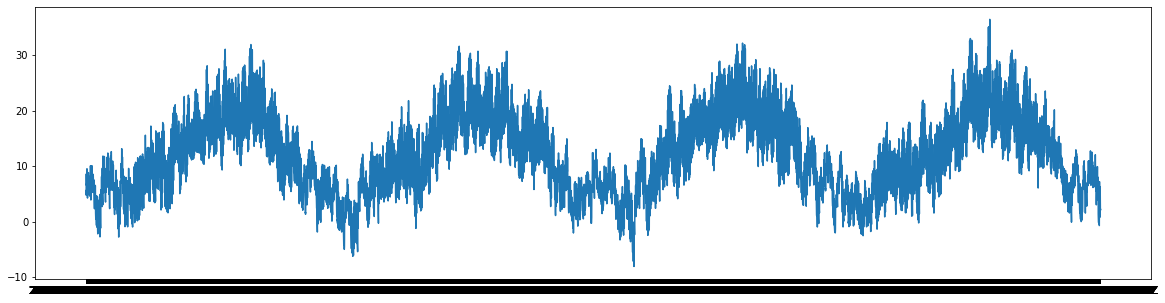

In [ ]:
# 9 min
x = df['utc_timestamp']
y = df['temperature']

plt.figure(figsize=(20,5))
plt.plot(x,y)

In [ ]:
df.describe()

,temperature,radiation_direct_horizontal,radiation_diffuse_horizontal
count,35064.000000,35064.000000,35064.000000
mean,11.765980,96.463088,69.280033
std,7.352578,175.675814,89.888464
min,-8.106000,0.000000,0.000000
25%,6.044000,0.000000,0.000000
50%,11.116500,0.731300,8.353950
75%,17.125000,106.231550,126.970250
max,36.465000,871.955600,398.571300


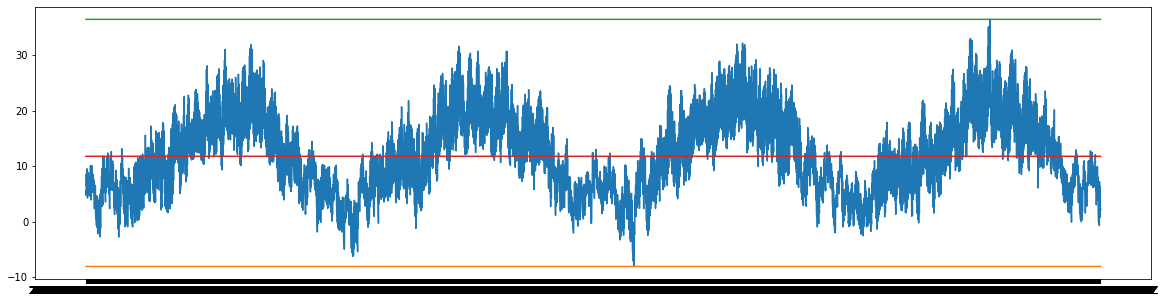

In [ ]:
#9 min
df["t_min"] = df['temperature'].min()
df["t_max"] = df['temperature'].max()
df["t_mean"] = df['temperature'].mean()

x = df['utc_timestamp']
y = df['temperature']

plt.figure(figsize=(20,5))
plt.plot(x, df['temperature'])
plt.plot(x, df["t_min"])
plt.plot(x, df["t_max"])
plt.plot(x, df["t_mean"])

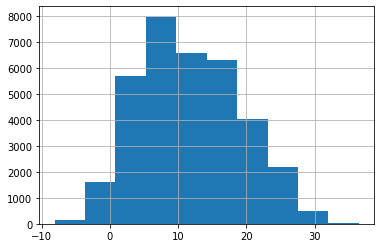

In [ ]:
df['temperature'].hist()

<Figure size 800x800 with 0 Axes>

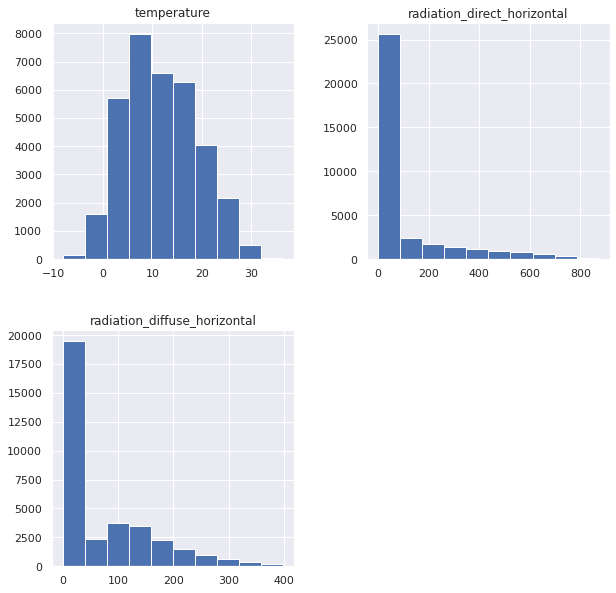

In [43]:
fig = plt.figure(figsize=(4, 4), dpi=200)
df.hist(figsize=(10,10))
plt.show()

## Квантили
"99%-ый квантиль равен 28 градусам", если в 99% случаев температура не превышала 28 градусов

In [ ]:
df['temperature'].quantile(0.99)

28.466810000000034

In [ ]:
df['temperature'].quantile(0.01)

-2.02981

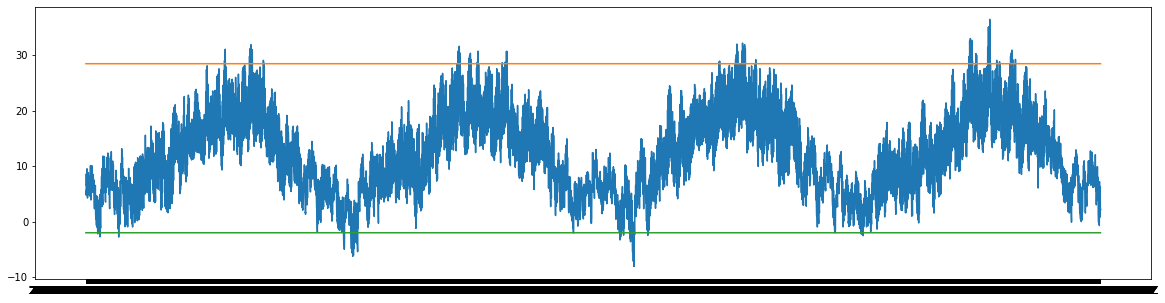

In [11]:
df['temperature_quantile_99'] = df['temperature'].quantile(0.99)
df['temperature_quantile_01'] = df['temperature'].quantile(0.01)

x = df['utc_timestamp']

plt.figure(figsize=(20,5))
plt.plot(x, df['temperature'])
plt.plot(x, df['temperature_quantile_99'])
plt.plot(x, df['temperature_quantile_01'])

## Коррелляция параметров
___Коррелляция___ - это величина, которая показывает, насколько похоже 2 ряда себя ведут: убывают и возрастают они одновременно (=1) или в противофазе (=-1)  
![](https://drive.google.com/uc?export=view&id=1VCjC2CcqUSmj3GFn8ibybdJ0cOPT6nfS)
![](https://drive.google.com/uc?export=view&id=1QehF56M3d58DAKz7FdHRNhmxLobG-lte)

In [20]:
round(df[["temperature", "radiation_direct_horizontal", "radiation_diffuse_horizontal"]].corr(), 3)

,temperature,radiation_direct_horizontal,radiation_diffuse_horizontal
temperature,1.000,0.561,0.453
radiation_direct_horizontal,0.561,1.000,0.541
radiation_diffuse_horizontal,0.453,0.541,1.000


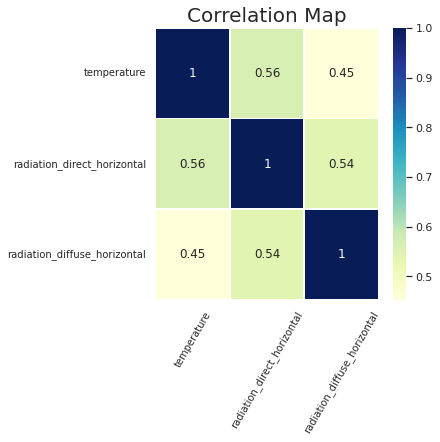

In [44]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (5, 5)})
        sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.7)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlated_map(df[["temperature", "radiation_direct_horizontal", "radiation_diffuse_horizontal"]], plot=True)

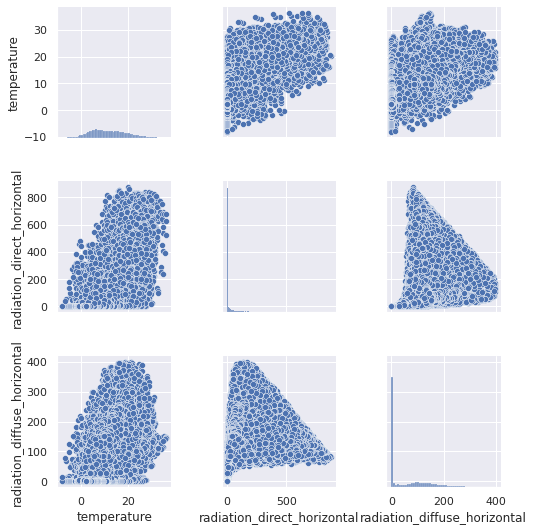

In [21]:
import seaborn as sns; sns.set()

sns.pairplot(df[["temperature", "radiation_direct_horizontal", "radiation_diffuse_horizontal"]])

## Автокоррелляция, сезонность
___Автокоррелляция___ - это величина, которая показывает, насколько ряд X скорреллирован с собой, но сдвинутым на некоторый интервал ```X+t``` (такой интервал называется *лагом*)

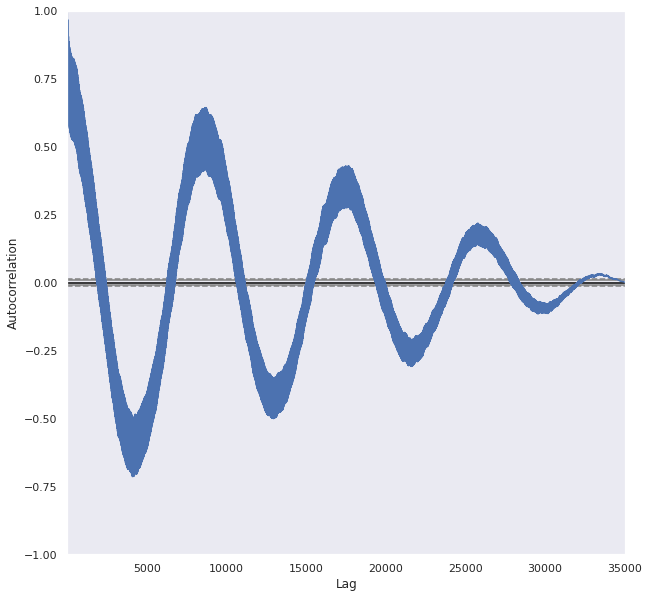

In [25]:
pd.plotting.autocorrelation_plot(df["temperature"])

Почему сезонность с таким большим лагом (более 5000), если температура повторяется каждый год?  
Потому что замеры сделаны каждый час

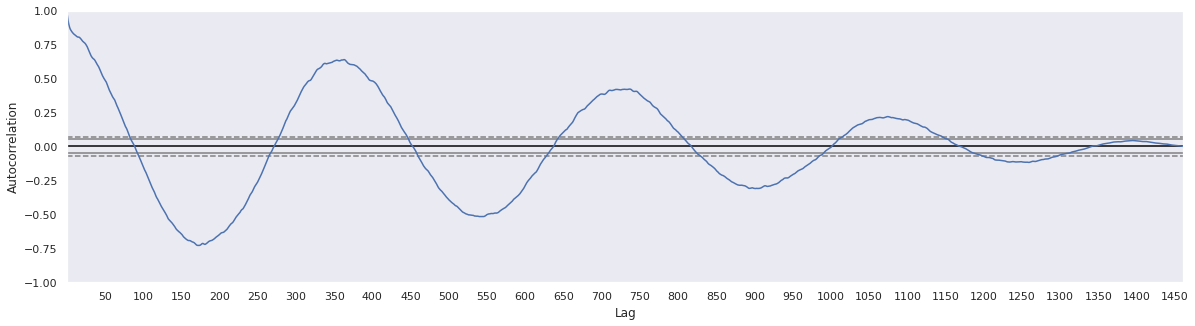

In [40]:
# оставим по 1 замеру в день - в полдень
df_daily = df[df['utc_timestamp'].dt.hour == 12]  # выбираем записи, сделанные только в 12 часов дня

plt.figure(figsize=(20,5))
pd.plotting.autocorrelation_plot(df_daily["temperature"])
plt.locator_params(axis='x', nbins=50)